In [186]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline 
import warnings                        
warnings.filterwarnings("ignore")

In [187]:
#Exploratory Data Analysis
train=pd.read_csv('train.csv')

In [188]:
test=pd.read_csv('test.csv')

In [189]:
train_original=train.copy() 
test_original=test.copy()

In [190]:
train.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'is_Married', 'family_size',
       'height', 'annual_income', 'job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice', 'vehicle_choice'],
      dtype='object')

In [191]:
test.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'is_Married', 'family_size',
       'height', 'annual_income', 'job', 'is_physically_ok',
       'has_taken_car_loan', 'preferable_fuel_choice'],
      dtype='object')

In [192]:
train.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
2,CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
3,CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle


In [193]:
test.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
0,CusID_30000,32.0,Female,Delhi,Married,6.0,142.0,150800.0,Service,Yes,No,Diesel
1,CusID_30001,22.0,Male,Perth,Divorced,4.0,155.0,167000.0,Service,Yes,No,Petrol
2,CusID_30002,46.0,Female,Barcelona,Married,2.0,NaN,66000.0,Service,Yes,No,Petrol
3,CusID_30003,35.0,NaN,Kuala Lampur,Single,1.0,137.0,71820.0,Business,Yes,NaN,Petrol
4,CusID_30004,48.0,Male,Sydney,Married,3.0,162.0,6500.0,Service,Yes,Yes,Hybrid


In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Age                     29561 non-null  float64
 2   Gender                  29583 non-null  object 
 3   City                    29577 non-null  object 
 4   is_Married              29580 non-null  object 
 5   family_size             29586 non-null  float64
 6   height                  29569 non-null  float64
 7   annual_income           29581 non-null  float64
 8   job                     29572 non-null  object 
 9   is_physically_ok        29578 non-null  object 
 10  has_taken_car_loan      29569 non-null  object 
 11  preferable_fuel_choice  29572 non-null  object 
 12  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.0+ MB


In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              5000 non-null   object 
 1   Age                     4933 non-null   float64
 2   Gender                  4919 non-null   object 
 3   City                    4928 non-null   object 
 4   is_Married              4915 non-null   object 
 5   family_size             4927 non-null   float64
 6   height                  4933 non-null   float64
 7   annual_income           4922 non-null   float64
 8   job                     4926 non-null   object 
 9   is_physically_ok        4934 non-null   object 
 10  has_taken_car_loan      4939 non-null   object 
 11  preferable_fuel_choice  4917 non-null   object 
dtypes: float64(4), object(8)
memory usage: 468.9+ KB


In [196]:
train.dtypes

CustomerID                 object
Age                       float64
Gender                     object
City                       object
is_Married                 object
family_size               float64
height                    float64
annual_income             float64
job                        object
is_physically_ok           object
has_taken_car_loan         object
preferable_fuel_choice     object
vehicle_choice             object
dtype: object

In [197]:
test.dtypes

CustomerID                 object
Age                       float64
Gender                     object
City                       object
is_Married                 object
family_size               float64
height                    float64
annual_income             float64
job                        object
is_physically_ok           object
has_taken_car_loan         object
preferable_fuel_choice     object
dtype: object

In [198]:
train.shape 

(30000, 13)

In [199]:
test.shape

(5000, 12)

In [200]:
##target variable
train['vehicle_choice'].value_counts()

Sports Utility Vehicle     3718
Compact Utility Vehicle    3137
Luxury Sedan               2887
Crossover                  2640
Sports Sedan               2317
Utility Vehicle            2309
Sedan                      2210
Hatchback                  1853
Compact Sedan              1629
Pickup-Truck               1566
Luxury Coupe               1097
Sportscar                  1011
Convertible                 949
Station Wagon               911
Coupe                       549
Sports Coupe                549
Utility vehicle             340
Minivan                     328
Name: vehicle_choice, dtype: int64

<AxesSubplot:>

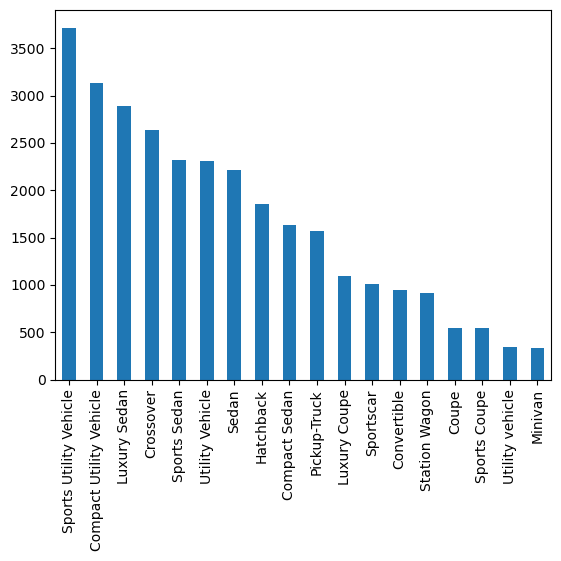

In [201]:
train['vehicle_choice'].value_counts().plot.bar()

In [202]:
corr_matrix = train.corr()

<AxesSubplot:>

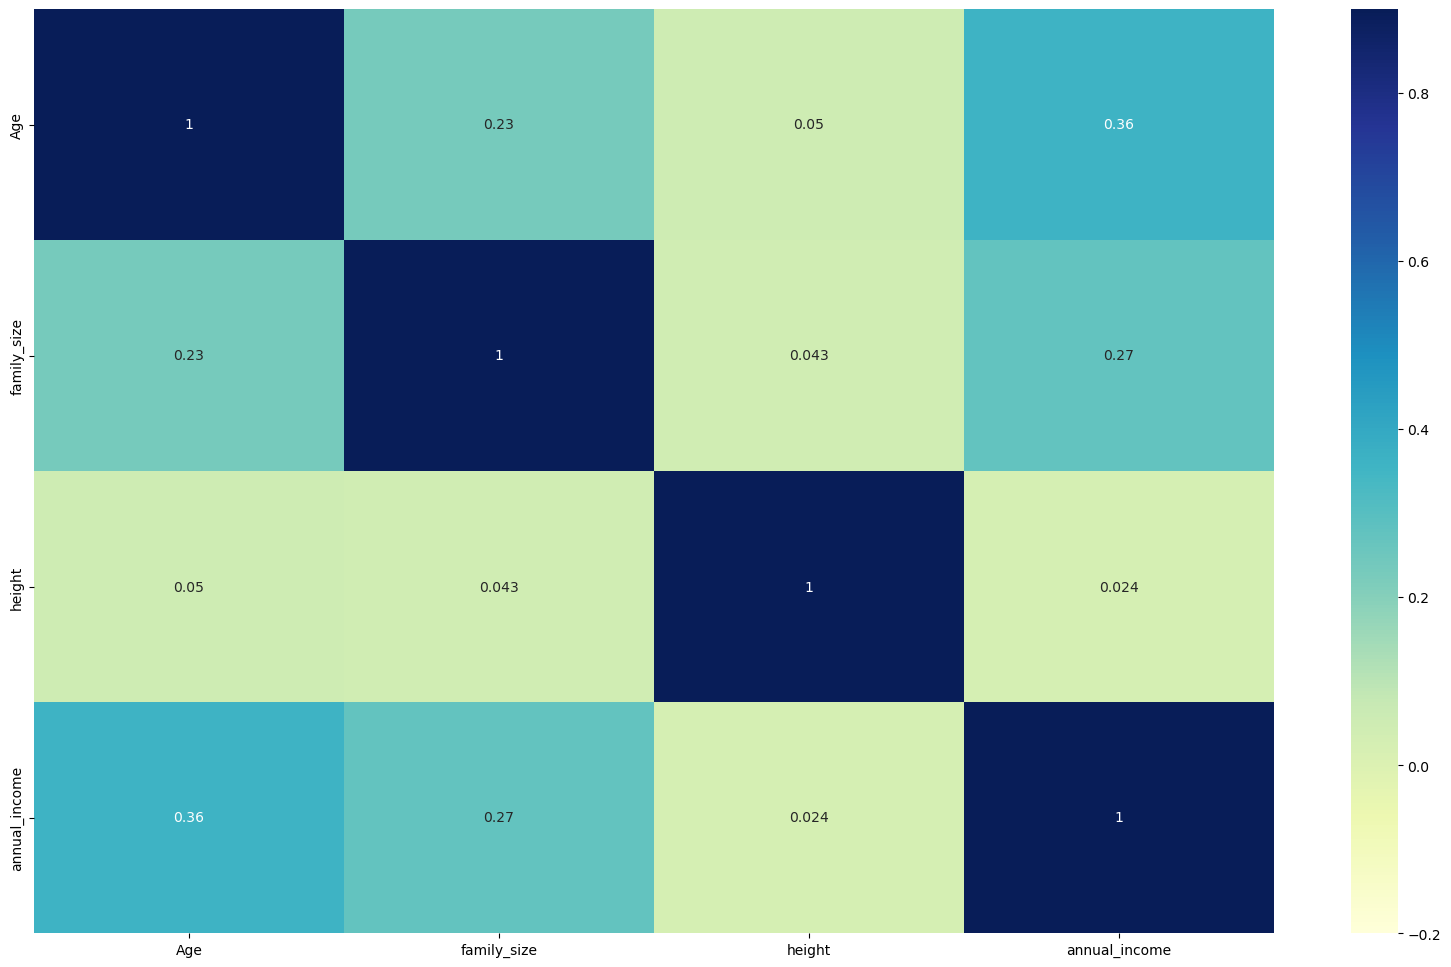

In [203]:
plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix,vmin =-0.2,vmax = 0.9,annot=True,cmap='YlGnBu')

In [204]:
#Missing Value Imputation

In [205]:
train.isnull().sum()

CustomerID                  0
Age                       439
Gender                    417
City                      423
is_Married                420
family_size               414
height                    431
annual_income             419
job                       428
is_physically_ok          422
has_taken_car_loan        431
preferable_fuel_choice    428
vehicle_choice              0
dtype: int64

In [206]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['City'].fillna(train['City'].mode()[0], inplace=True)
train['is_Married'].fillna(train['is_Married'].mode()[0], inplace=True)
train['job'].fillna(train['job'].mode()[0], inplace=True)
train['is_physically_ok'].fillna(train['is_physically_ok'].mode()[0], inplace=True)
train['has_taken_car_loan'].fillna(train['has_taken_car_loan'].mode()[0], inplace=True)
train['preferable_fuel_choice'].fillna(train['preferable_fuel_choice'].mode()[0], inplace=True)
train['annual_income'].fillna(train['annual_income'].median(), inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace=True)
train['family_size'].fillna(train['family_size'].mean(), inplace=True)
train['height'].fillna(train['height'].mean(), inplace=True)

In [207]:
train.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
vehicle_choice            0
dtype: int64

In [208]:
test.isnull().sum()

CustomerID                 0
Age                       67
Gender                    81
City                      72
is_Married                85
family_size               73
height                    67
annual_income             78
job                       74
is_physically_ok          66
has_taken_car_loan        61
preferable_fuel_choice    83
dtype: int64

In [209]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['City'].fillna(test['City'].mode()[0], inplace=True)
test['is_Married'].fillna(test['is_Married'].mode()[0], inplace=True)
test['job'].fillna(test['job'].mode()[0], inplace=True)
test['is_physically_ok'].fillna(test['is_physically_ok'].mode()[0], inplace=True)
test['has_taken_car_loan'].fillna(test['has_taken_car_loan'].mode()[0], inplace=True)
test['preferable_fuel_choice'].fillna(test['preferable_fuel_choice'].mode()[0], inplace=True)
test['annual_income'].fillna(test['annual_income'].median(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['family_size'].fillna(test['family_size'].mean(), inplace=True)
test['height'].fillna(test['height'].mean(), inplace=True)

In [210]:
test.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
dtype: int64

In [211]:
test.shape

(5000, 12)

<AxesSubplot:>

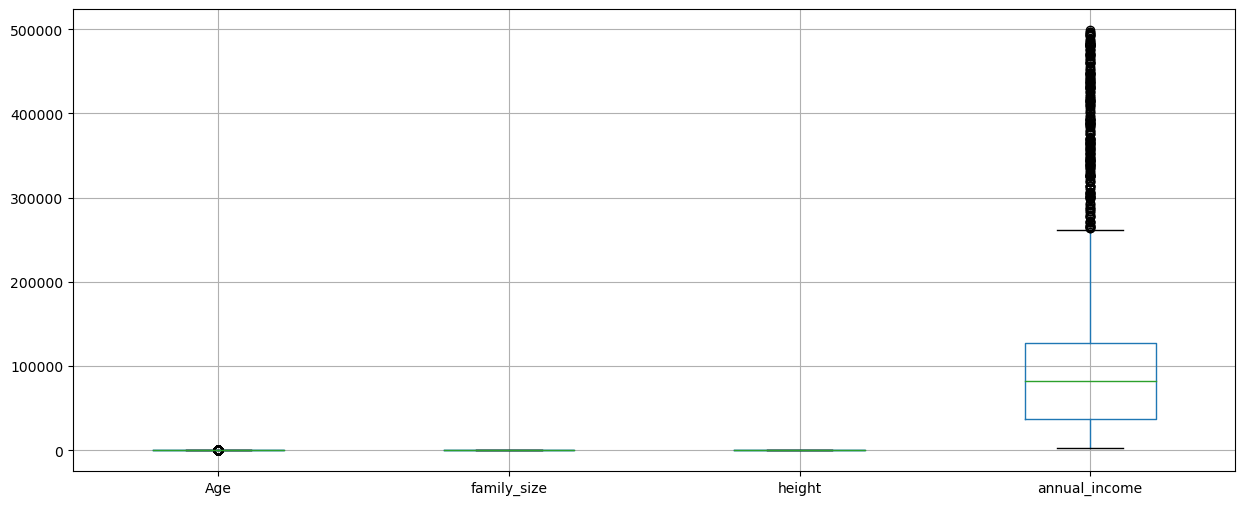

In [212]:
#Outlier Treatment
plt.figure(figsize=(15,6))
train.boxplot()

In [213]:
for i in ['Age','annual_income']:
    print(i)
    Q1=np.percentile(train[i],25,interpolation='midpoint')
    Q2=np.percentile(train[i],50,interpolation='midpoint')
    Q3=np.percentile(train[i],75,interpolation='midpoint')
    print(Q1, Q2, Q3)

    IQR=Q3-Q1
    print(IQR)   

    low_limit=Q1-1.5*IQR
    upp_limit=Q3+1.5*IQR
    print('LOWER LIMIT = ',low_limit)
    print('UPPER LIMIT = ',upp_limit)

    drop_index = train[(train[i] < low_limit) | (train[i] > upp_limit)].index
    train.drop(drop_index,inplace=True)
train 

Age
24.0 30.0 36.0
12.0
LOWER LIMIT =  6.0
UPPER LIMIT =  54.0
annual_income
36515.0 82070.0 126560.0
90045.0
LOWER LIMIT =  -98552.5
UPPER LIMIT =  261627.5


,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.000000,Male,New York City,Divorced,2.0,160.000000,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.000000,Female,New York City,Single,1.0,143.000000,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
3,CusID_00003,23.000000,Male,Vancouver,Divorced,3.0,165.000000,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.000000,Not_Specified,Vancouver,Single,1.0,147.000000,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle
5,CusID_00005,46.000000,Female,Vancouver,Divorced,4.0,146.000000,84140.0,Business,Yes,No,Diesel,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,CusID_29995,24.000000,Female,Vienna,Divorced,3.0,155.000000,91320.0,Business,Yes,No,Petrol,Sedan
29996,CusID_29996,32.000000,Female,Shinjuku,Married,5.0,163.000000,133210.0,Business,Yes,No,Diesel,Sports Utility Vehicle
29997,CusID_29997,24.000000,Female,San Francisco,Single,1.0,153.023741,87300.0,Service,Yes,No,Petrol,Luxury Sedan
29998,CusID_29998,30.998545,Female,Vienna,Married,2.0,139.000000,94580.0,Business,Yes,No,Petrol,Sports Utility Vehicle


<AxesSubplot:>

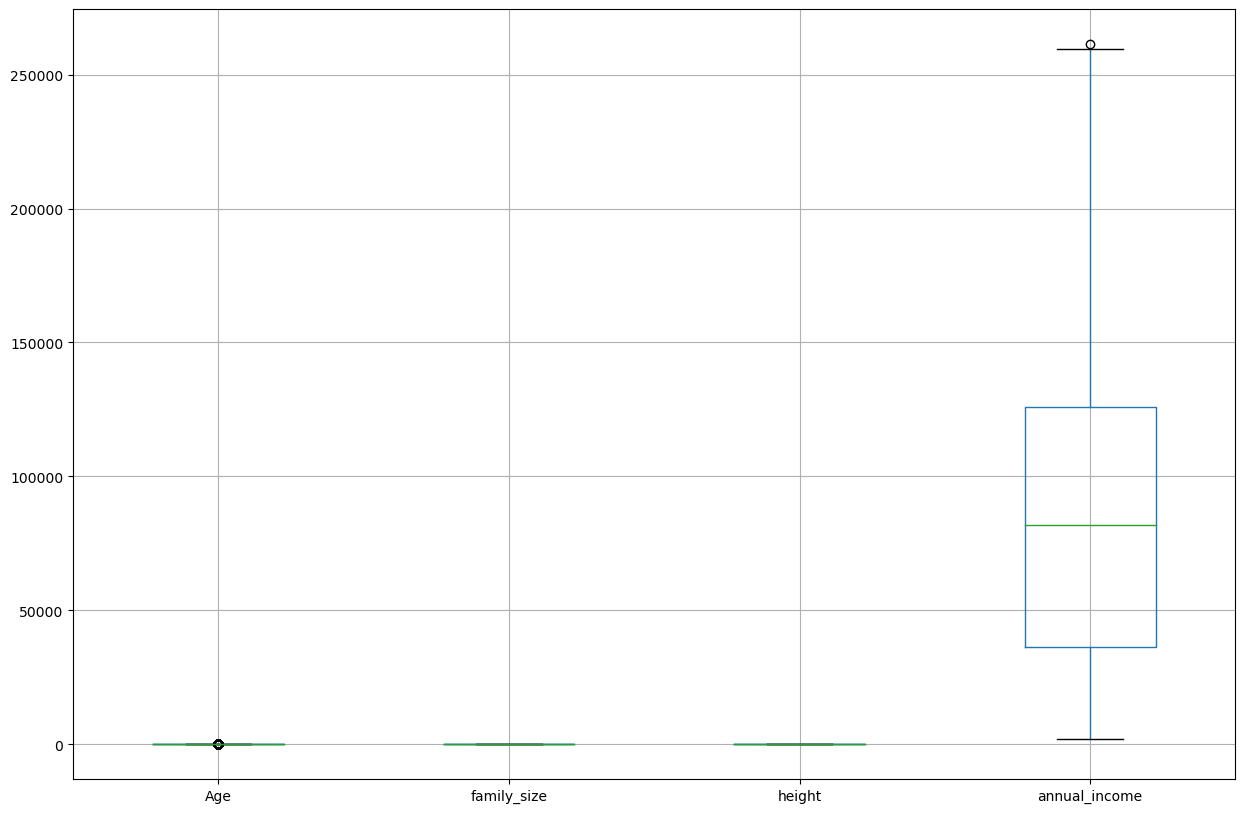

In [214]:
plt.figure(figsize=(15,10))
train.boxplot()

In [215]:
test.shape

(5000, 12)

In [216]:
train.shape

(28828, 13)

In [217]:
#Encoding
train.dtypes

CustomerID                 object
Age                       float64
Gender                     object
City                       object
is_Married                 object
family_size               float64
height                    float64
annual_income             float64
job                        object
is_physically_ok           object
has_taken_car_loan         object
preferable_fuel_choice     object
vehicle_choice             object
dtype: object

In [218]:
train=train.drop('CustomerID',axis=1) 
test=test.drop('CustomerID',axis=1)

In [219]:
# # from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# train['Gender']=label_encoder.fit_transform(train['Gender'])
# train['City']=label_encoder.fit_transform(train['City'])
# train['is_Married']=label_encoder.fit_transform(train['is_Married'])
# train['job']=label_encoder.fit_transform(train['job'])
# train['is_physically_ok']=label_encoder.fit_transform(train['is_physically_ok'])
# train['has_taken_car_loan']=label_encoder.fit_transform(train['has_taken_car_loan'])
# train['preferable_fuel_choice']=label_encoder.fit_transform(train['preferable_fuel_choice'])
# train['vehicle_choice']=label_encoder.fit_transform(train['vehicle_choice'])

In [220]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# test['Gender']=label_encoder.fit_transform(test['Gender'])
# test['City']=label_encoder.fit_transform(test['City'])
# test['is_Married']=label_encoder.fit_transform(test['is_Married'])
# test['job']=label_encoder.fit_transform(test['job'])
# test['is_physically_ok']=label_encoder.fit_transform(test['is_physically_ok'])
# test['has_taken_car_loan']=label_encoder.fit_transform(test['has_taken_car_loan'])
# test['preferable_fuel_choice']=label_encoder.fit_transform(test['preferable_fuel_choice'])

In [221]:
test.dtypes

Age                       float64
Gender                     object
City                       object
is_Married                 object
family_size               float64
height                    float64
annual_income             float64
job                        object
is_physically_ok           object
has_taken_car_loan         object
preferable_fuel_choice     object
dtype: object

In [222]:
train=train.drop(["City","height","Gender","job","is_Married","has_taken_car_loan","preferable_fuel_choice","is_physically_ok"],axis=1)
train

,Age,family_size,annual_income,vehicle_choice
0,36.000000,2.0,32200.0,Sedan
1,15.000000,1.0,9000.0,Compact Utility Vehicle
3,23.000000,3.0,141140.0,Sportscar
4,23.000000,1.0,38100.0,Sports Utility Vehicle
5,46.000000,4.0,84140.0,Sedan
...,...,...,...,...
29995,24.000000,3.0,91320.0,Sedan
29996,32.000000,5.0,133210.0,Sports Utility Vehicle
29997,24.000000,1.0,87300.0,Luxury Sedan
29998,30.998545,2.0,94580.0,Sports Utility Vehicle


In [223]:
test=test.drop(["City","height","Gender","is_Married","job","has_taken_car_loan","preferable_fuel_choice","is_physically_ok"],axis=1)
test

,Age,family_size,annual_income
0,32.0,6.0,150800.0
1,22.0,4.0,167000.0
2,46.0,2.0,66000.0
3,35.0,1.0,71820.0
4,48.0,3.0,6500.0
...,...,...,...
4995,31.0,5.0,81480.0
4996,39.0,2.0,52870.0
4997,28.0,4.0,151500.0
4998,37.0,5.0,110470.0


In [224]:
x=train.drop("vehicle_choice",1)
y=train.vehicle_choice

In [225]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)

In [226]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=102)

In [227]:
#random forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)

#PRINT THE PREDICTION OF THE RANDOM FOREST CLASSIFIER
pred_rf=forest.predict(x_test)
acc_rf=accuracy_score(y_test,pred_rf)*100
acc_rf

27.72574864146144

In [228]:
pred_test=forest.predict(test)

In [229]:
vehicle_choicecsv=pd.DataFrame({"CustomerID":test_original["CustomerID"],"vehicle_choice":pred_test})
vehicle_choicecsv.set_index("CustomerID", inplace=True)

In [230]:
vehicle_choicecsv

,vehicle_choice
CustomerID,
CusID_30000,Sports Utility Vehicle
CusID_30001,Luxury Sedan
CusID_30002,Pickup-Truck
CusID_30003,Sports Utility Vehicle
CusID_30004,Hatchback
...,...
CusID_34995,Compact Utility Vehicle
CusID_34996,Coupe
CusID_34997,Sports Coupe


In [231]:
pd.DataFrame(vehicle_choicecsv, columns=['CustomerID','vehicle_choice']).to_csv('RF.csv')

In [233]:
from IPython.display import HTML
import base64 
def create_download_link( vehicle_choicecsv, title = "Download CSV file", filename = "RF.csv"):  
    csv = vehicle_choicecsv.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(vehicle_choicecsv)